In [1]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [3]:
!git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [4]:
## 훈련 데이터 읽어옴
data_set = np.loadtxt('./data/ThoraricSurgery3.csv', delimiter=",")
X = data_set[:, 0:16]
y = data_set[:, -1]

In [5]:
print(X.shape, y.shape)

(470, 16) (470,)


In [6]:
## 모델 생성, 컴파일, 실행
model = Sequential()
model.add(Dense(30, input_dim = 16, activation = 'relu')) # 층 추가 (활성화 함수 -> relu)
model.add(Dense(1, activation = 'sigmoid')) # 활성화 함수 -> sigmoid

## 모델 컴파일, 조건식 (손실함수, 최적화, 정확도, 손실률...) 
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## 모델 학습
history = model.fit(X, y, epochs = 5, batch_size = 16)

Epoch 1/5
30/30 [==============================] - 1s 2ms/step - loss: 0.5705 - accuracy: 0.7596
Epoch 2/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8532
Epoch 3/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8532
Epoch 4/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.8489
Epoch 5/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8511


In [7]:
history.history

{'loss': [0.5704790353775024,
  0.4543561637401581,
  0.4431438446044922,
  0.446072518825531,
  0.43479955196380615],
 'accuracy': [0.7595744729042053,
  0.8531914949417114,
  0.8531914949417114,
  0.848936140537262,
  0.8510638475418091]}

In [8]:
x = np.array([2,4,6,8])
y=  np.array([81,93,91,97])

In [9]:
mx = np.mean(x)
my = np.mean(y)

print('x의 평균값: ', mx)
print('y의 평균값: ', my)

x의 평균값:  5.0
y의 평균값:  90.5


In [10]:
divisor = sum([(i - mx) ** 2 for i in x])

In [11]:
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d

In [12]:
dividend = top(x, mx, y, my)

print("분모: ", divisor)
print("분자: ", dividend)

분모:  20.0
분자:  46.0


In [13]:
a = dividend / divisor
b = my - (mx * a)

print('기울기 a = ',a)
print('절편 b = ',b)

기울기 a =  2.3
절편 b =  79.0


In [14]:
## 예측 공부한 시간이 7시간이면 성적은?

print(a * 7 + b)

95.1


In [15]:
fake_a = 3
fake_b = 76

In [16]:
def predict(x):
    return fake_a * x + fake_b

In [17]:
predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    
    print('공부시간 = %.f, 실제점수 = %.f, 예측점수 = %.f' % (x[i], y[i], predict(x[i])))

공부시간 = 2, 실제점수 = 81, 예측점수 = 82
공부시간 = 4, 실제점수 = 93, 예측점수 = 88
공부시간 = 6, 실제점수 = 91, 예측점수 = 94
공부시간 = 8, 실제점수 = 97, 예측점수 = 100


In [18]:
n = len(x)

def mse(y,y_pred):
    return (1/n) * sum((y - y_pred) ** 2)

In [19]:
print('평균 제곱 오차: ' + str(mse(y, predict_result)))

평균 제곱 오차: 11.0


In [20]:
# !pip install matplotlib

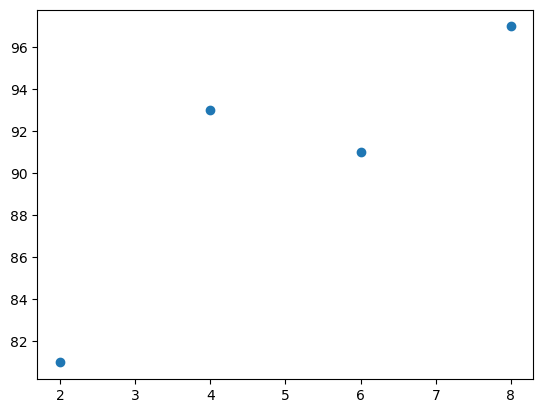

In [21]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

In [22]:
a = 0
b = 0
lr = 0.03
epochs = 2001
n = len(x)

for i in range(epochs):
    y_pred = a * x + b
    error = y - y_pred
    
    a_diff = (2 / n) * sum(-x * (error))
    b_diff = (2 / n) * sum(-(error))
    
    a = a - lr * a_diff
    b = b - lr * b_diff
    
    if i % 100 == 0:
        print('epoch = %.f, 기울기 = %.04f, 절편 = %.04f' % (i,a,b))

epoch = 0, 기울기 = 27.8400, 절편 = 5.4300
epoch = 100, 기울기 = 7.0739, 절편 = 50.5117
epoch = 200, 기울기 = 4.0960, 절편 = 68.2822
epoch = 300, 기울기 = 2.9757, 절편 = 74.9678
epoch = 400, 기울기 = 2.5542, 절편 = 77.4830
epoch = 500, 기울기 = 2.3956, 절편 = 78.4293
epoch = 600, 기울기 = 2.3360, 절편 = 78.7853
epoch = 700, 기울기 = 2.3135, 절편 = 78.9192
epoch = 800, 기울기 = 2.3051, 절편 = 78.9696
epoch = 900, 기울기 = 2.3019, 절편 = 78.9886
epoch = 1000, 기울기 = 2.3007, 절편 = 78.9957
epoch = 1100, 기울기 = 2.3003, 절편 = 78.9984
epoch = 1200, 기울기 = 2.3001, 절편 = 78.9994
epoch = 1300, 기울기 = 2.3000, 절편 = 78.9998
epoch = 1400, 기울기 = 2.3000, 절편 = 78.9999
epoch = 1500, 기울기 = 2.3000, 절편 = 79.0000
epoch = 1600, 기울기 = 2.3000, 절편 = 79.0000
epoch = 1700, 기울기 = 2.3000, 절편 = 79.0000
epoch = 1800, 기울기 = 2.3000, 절편 = 79.0000
epoch = 1900, 기울기 = 2.3000, 절편 = 79.0000
epoch = 2000, 기울기 = 2.3000, 절편 = 79.0000


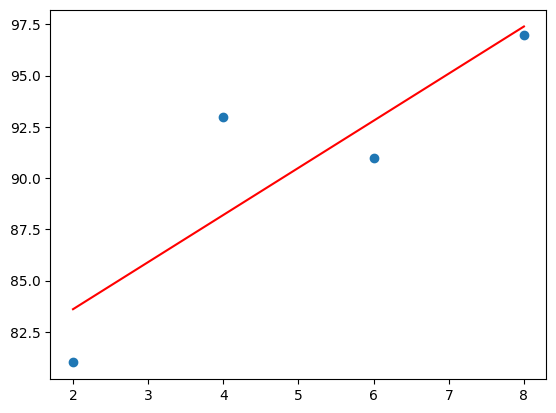

In [23]:
y_pred = a * x + b

plt.scatter(x,y)
plt.plot(x,y_pred, 'r')
plt.show()

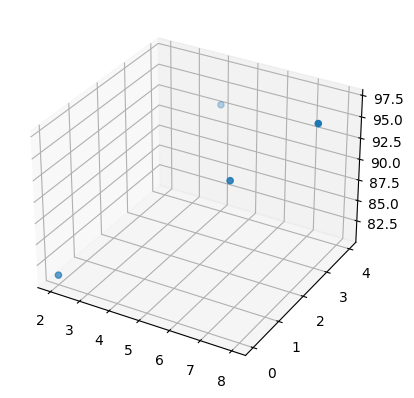

In [24]:
## 다중선형회귀
x1 = np.array([2,4,6,8])
x2 = np.array([0,4,2,3])
y = np.array([81,93,91,97])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

In [25]:
a1 = 0
a2 = 0
b = 0
lr = 0.01
n = len(x1)

for i in range(epochs):
    y_pred = a1 * x1 + a2 * x2 + b
    error = y - y_pred
    
    a1_diff = (2 / n) * sum(-x1 * (error))
    a2_diff = (2 / n) * sum(-x2 * (error))
    b_diff = (2 / n) * sum(-(error))
    
    a1 = a1 - lr * a1_diff
    a2 = a2 - lr * a2_diff
    b = b - lr * b_diff
    
    if i % 100 == 0:
        print('epoch = %.f, 기울기1 = %.04f, 기울기2 = %.04f, 절편 = %.04f' % (i,a1,a2,b))

print("실제 점수: ", y)
print("예측 점수: ", y_pred)

epoch = 0, 기울기1 = 9.2800, 기울기2 = 4.2250, 절편 = 1.8100
epoch = 100, 기울기1 = 9.5110, 기울기2 = 5.0270, 절편 = 22.9205
epoch = 200, 기울기1 = 7.3238, 기울기2 = 4.2950, 절편 = 37.8751
epoch = 300, 기울기1 = 5.7381, 기울기2 = 3.7489, 절편 = 48.7589
epoch = 400, 기울기1 = 4.5844, 기울기2 = 3.3507, 절편 = 56.6800
epoch = 500, 기울기1 = 3.7447, 기울기2 = 3.0608, 절편 = 62.4448
epoch = 600, 기울기1 = 3.1337, 기울기2 = 2.8498, 절편 = 66.6404
epoch = 700, 기울기1 = 2.6890, 기울기2 = 2.6962, 절편 = 69.6938
epoch = 800, 기울기1 = 2.3653, 기울기2 = 2.5845, 절편 = 71.9160
epoch = 900, 기울기1 = 2.1297, 기울기2 = 2.5032, 절편 = 73.5333
epoch = 1000, 기울기1 = 1.9583, 기울기2 = 2.4440, 절편 = 74.7103
epoch = 1100, 기울기1 = 1.8336, 기울기2 = 2.4009, 절편 = 75.5670
epoch = 1200, 기울기1 = 1.7428, 기울기2 = 2.3695, 절편 = 76.1904
epoch = 1300, 기울기1 = 1.6767, 기울기2 = 2.3467, 절편 = 76.6441
epoch = 1400, 기울기1 = 1.6286, 기울기2 = 2.3301, 절편 = 76.9743
epoch = 1500, 기울기1 = 1.5936, 기울기2 = 2.3180, 절편 = 77.2146
epoch = 1600, 기울기1 = 1.5681, 기울기2 = 2.3092, 절편 = 77.3895
epoch = 1700, 기울기1 = 1.5496, 기울기2 = 2.3028, 